## 특정 날짜의 범위를 지정하면 그 기간 동안의 최고 온도(빨간색), 최저 온도(파란색), 평균 온도(녹색)를 그래프로 그려주는 함수를 만드시오

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def genNewTempDataFile():
    dataFileName = 'daegu_temp_20years.csv'     # 20년간 대구의 최고기온, 최저기온, 평균기온을 갖는 데이터를 읽어옴
    newFileName = 'new_daegu_temp.csv'          # 새로 write할 파일 명을 'new_daegu_temp.csv'로 설정
    
    read_f = open(dataFileName, 'r')
    write_f = open(newFileName, 'w')
    
    while True:
        line = read_f.readline()
        if not line:
            break
        
        splitData = line.split(',')
        
        skipWriting = False
        if len(splitData) == 5 and splitData[1].isnumeric():
            splitData[0] = splitData[0].replace('-', '')          # splitData[0]의 원소(날짜)의 형식 변경. ex) 2015-06-17 --> 20150617 
            
            for data in splitData:                          
                try:                                              # splitData를 float형식으로 변경. 
                    float(data)
                except ValueError:                                # ValueError 발생 시 예외처리 후 출력.
                    print("에러 : ", splitData[0])
                    skipWriting = True
                    break
                    
            if not skipWriting:                                   # skipWriting이 True일 경우(ValueError가 없을 경우) splitData를 , 로 결합하고 새로 write
                newData = ','.join(splitData)
                write_f.write(newData)

    write_f.close()
    read_f.close()

In [6]:
genNewTempDataFile()

에러 :  20130930
에러 :  20170729


In [7]:
dataFileName = 'new_daegu_temp.csv'
tempdata = np.loadtxt(dataFileName, delimiter = ',')

In [8]:
tempdata.shape

(7333, 5)

In [9]:
def plotTempData(tempData, startDate, endDate):
    condition = np.logical_and(tempData[:,0] >= startDate, tempData[:,0] <= endDate)
    yearData = tempData[condition]
    xticks = yearData[:,0].astype(np.int).astype(str)
    plt.plot(xticks, yearData[:,2], 'g', label = 'Avg')
    plt.plot(xticks, yearData[:,3], 'b', label = 'Lowest')
    plt.plot(xticks, yearData[:,4], 'r', label = 'Highest')
    #xticks = np.linspace(startDate, endDate, 10, dtype=int)
    #print(xticks)
    xticks_step = len(yearData)//10
    plt.legend()
    plt.xticks(xticks[::xticks_step].astype(str), rotation = 45)
    plt.show()

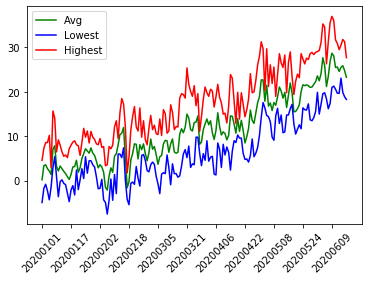

In [11]:
plotTempData(tempdata, 20200101, 20200617)

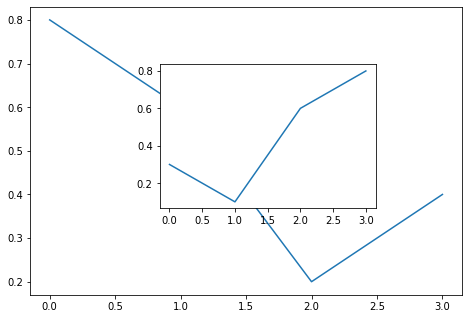

In [16]:
plt.figure()
plt.axes([0,0,1,1])    # axes가 갖고있는 범위 설정
plt.plot([0.8, 0.6, 0.2, 0.4])

plt.axes([0.3, 0.3, 0.5, 0.5])  #plt.axes 할 떄마다 하나씩 생김. 0.5는 전체 축의 50%을 의미. 0.3은 시작지점. 전체 폭의 30% 지점에서 시작
plt.plot([0.3, 0.1, 0.6, 0.8])

plt.show()

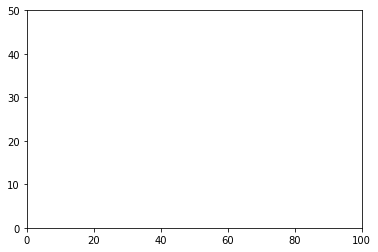

In [17]:
plt.figure()
plt.axes()
plt.axis([0, 100, 0, 50])
plt.show()

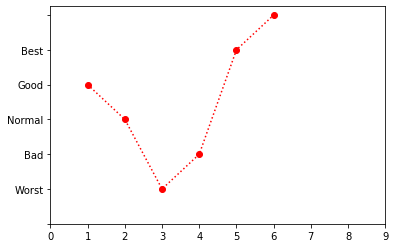

In [23]:
plt.figure()
plt.axes()

#plt.bar([1,2,3,4,5,6], [3,2,0,1,4,5])
plt.plot([1,2,3,4,5,6], [3,2,0,1,4,5], 'r:o')
plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(-1,6), ('','Worst', 'Bad', 'Normal', 'Good', 'Best'))  # y축에 숫자가 아닌 문자 대입

plt.show()

## - Pandas

 - Series : 리스트, 1차원 배열
 - DataFrame : 2차원 배열
 - Pandas : 데이터를 분석 및 조작하기 위해 파이썬으로 작성된 소프트웨어 라이브러리
 - 경제학 용어인 'PANel DAta' 에서 따옴
 - Google 에서 Pandas Guide 검색하면 나오는 PDF 파일이 있음.

  -  1차원 배열, 여러가지 다른 data type을 가질 수 있습니다.
  -  리스트나 튜플, 딕셔너리로 부터 시리즈를 생성

In [7]:
import numpy as np
import pandas as pd

In [27]:
h = ('AA', '2020-07-28', 100, 2.5)

In [28]:
h

('AA', '2020-07-28', 100, 2.5)

In [33]:
s = pd.Series(h)    # 0, 1, 2, 3 은 index, 그 라인의 값은 들어있는 값
s

0            AA
1    2020-07-28
2           100
3           2.5
dtype: object

In [46]:
d = {'name':'앙문스', 'id':20200911, 'grade':4.3}

ds = pd.Series(d)   # 딕셔너리를 시리즈로 만듦

In [38]:
print(ds)       # 딕셔너리로 시리즈를 만들면 입력한 key값을 index로 사용

name          윤종희
id       20200911
grade         4.3
dtype: object


In [39]:
type(ds)

pandas.core.series.Series

In [40]:
s[0:2]

0            AA
1    2020-07-28
dtype: object

In [47]:
ds[0]

'앙문스'

In [50]:
ds['name']  # key를 index로 사용 가능

'앙문스'

In [51]:
s2 = pd.Series(h, index = ['name', 'date', 'score', 'grade'])

In [54]:
print(s)

0            AA
1    2020-07-28
2           100
3           2.5
dtype: object


In [55]:
print(s2)

name             AA
date     2020-07-28
score           100
grade           2.5
dtype: object


In [59]:
s2[ ['name', 'date', 'grade'] ]  # List로 찾고자 하는 값을 찾을 수 있음

name             AA
date     2020-07-28
grade           2.5
dtype: object

### DataFrame

2차원 배열의 데이터를 다룸 

column-index와 row-index를 가짐

보통, 같은 크기의 리스트를 가진 딕셔너리로부터 생성됨. 엑셀파일, csv 형태의 파일로 부터도 생성 가능.

In [5]:
data = {'name' : ['앙문스', '홍길동', '임꺽정'],
        'birth' : ['1990-09-01', '1980-02-05', '2003-11-20'],
        'point' : [89, 34, 60],
        'rate' : [3.2, 1.2, 0.4]
        }

In [8]:
df = pd.DataFrame(data)     # data Frame 생성하는 생성자

In [64]:
df      # name, birth, point 는 column index

,name,birth,point,rate
0,앙문스,1990-09-01,89,3.2
1,홍길동,1980-02-05,34,1.2
2,임꺽정,2003-11-20,60,0.4


In [14]:
df['add'] = '미상'  # 새로운 열을 추가

In [67]:
df

,name,birth,point,rate,add
0,앙문스,1990-09-01,89,3.2,미상
1,홍길동,1980-02-05,34,1.2,미상
2,임꺽정,2003-11-20,60,0.4,미상


In [15]:
df['id'] = [1,2,3]  # 새로운 열 id 추가

In [16]:
df

,name,birth,point,rate,add,id
one,앙문스,1990-09-01,89,3.2,미상,1
two,홍길동,1980-02-05,34,1.2,미상,2
three,임꺽정,2003-11-20,60,0.4,미상,3


In [12]:
# row index 변경하기
df.index = ['one', 'two', 'three'] # 문자로 row index 사용
df

,name,birth,point,rate
one,앙문스,1990-09-01,89,3.2
two,홍길동,1980-02-05,34,1.2
three,임꺽정,2003-11-20,60,0.4


In [76]:
# column 중에 하나를 선택해서 row index로 설정하기
df2 = df.set_index(['name'])

In [77]:
df2     # name을 index로 갖고 있는 data Frame 생성

,birth,point,rate,add,id
name,,,,,
앙문스,1990-09-01,89,3.2,미상,1
홍길동,1980-02-05,34,1.2,미상,2
임꺽정,2003-11-20,60,0.4,미상,3


In [78]:
names = df['name']  # column index로 데이터를 추출

In [79]:
type(names)

pandas.core.series.Series

In [80]:
print(names)

one      앙문스
two      홍길동
three    임꺽정
Name: name, dtype: object


In [81]:
names['one']

'앙문스'

In [82]:
names[1]

'홍길동'

In [86]:
df.loc['two']   # row index로 데이터를 추출

name            홍길동
birth    1980-02-05
point            34
rate            1.2
add              미상
id                2
Name: two, dtype: object

In [84]:
type(df.loc['two'])

pandas.core.series.Series

In [87]:
df['birth']

one      1990-09-01
two      1980-02-05
three    2003-11-20
Name: birth, dtype: object

In [88]:
df.loc[:, 'point']

one      89
two      34
three    60
Name: point, dtype: int64

In [89]:
df2['birth']['앙문스']

'1990-09-01'

In [91]:
df2.loc['앙문스', 'birth']

'1990-09-01'

In [21]:
df['id2'] = [0, 0, 0]

In [22]:
df

,name,birth,point,rate,add,id,id2
one,앙문스,1990-09-01,89,3.2,미상,1,0
two,홍길동,1980-02-05,34,1.2,미상,2,0
three,임꺽정,2003-11-20,60,0.4,미상,3,0


In [23]:
# 열을 삭제하는 방법
# 자기 자신을 변경시킴
del df['id2']   

In [24]:
df

,name,birth,point,rate,add,id
one,앙문스,1990-09-01,89,3.2,미상,1
two,홍길동,1980-02-05,34,1.2,미상,2
three,임꺽정,2003-11-20,60,0.4,미상,3


In [17]:
df.drop('add', axis = 1) # axis에 1을 주면 column을 의미. 삭제한 DF를 반환. 자기자신을 변경시키진 않음.

,name,birth,point,rate,id
one,앙문스,1990-09-01,89,3.2,1
two,홍길동,1980-02-05,34,1.2,2
three,임꺽정,2003-11-20,60,0.4,3


In [25]:
df  # add가 그대로 있는 df

,name,birth,point,rate,add,id
one,앙문스,1990-09-01,89,3.2,미상,1
two,홍길동,1980-02-05,34,1.2,미상,2
three,임꺽정,2003-11-20,60,0.4,미상,3


In [18]:
# 행 삭제
df.drop('two', axis = 0)

,name,birth,point,rate,add,id
one,앙문스,1990-09-01,89,3.2,미상,1
three,임꺽정,2003-11-20,60,0.4,미상,3


In [27]:
df.iloc[0]  # iloc는 정수값을 사용

name            앙문스
birth    1990-09-01
point            89
rate            3.2
add              미상
id                1
Name: one, dtype: object

In [28]:
# read file
casts = pd.read_csv('cast.csv')

In [29]:
# 읽어온 data, casts의 크기
len(casts)  

75001

In [31]:
# Pandas 가 앞의 데이터 다섯개, 마지막 데이터 다섯 개만 보여줌.
casts   

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
...,...,...,...,...,...,...
74996,Mia fora kai ena... moro,2011,Penelope Anastasopoulou,actress,Popi voulkanizater,11.0
74997,The Magician King,2004,Tiannah Anastassiades,actress,Unicycle Race Attendant,NaN
74998,Festival of Lights,2010,Zoe Anastassiou,actress,Guidance Counselor,20.0
74999,Toxic Tutu,2016,Zoe Anastassiou,actress,Demon of Toxicity,NaN


In [32]:
# 앞에 값만 보기
casts.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [33]:
# 열줄 보기
casts.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


In [34]:
# 마지막 값만 보기
casts.tail()

,title,year,name,type,character,n
74996,Mia fora kai ena... moro,2011,Penelope Anastasopoulou,actress,Popi voulkanizater,11.0
74997,The Magician King,2004,Tiannah Anastassiades,actress,Unicycle Race Attendant,NaN
74998,Festival of Lights,2010,Zoe Anastassiou,actress,Guidance Counselor,20.0
74999,Toxic Tutu,2016,Zoe Anastassiou,actress,Demon of Toxicity,NaN
75000,Fugitive Pieces,2007,Anastassia Anastassopoulou,actress,Laundry Girl,25.0


In [35]:
# tiltles.csv 파일 읽어오기
titles = pd.read_csv('titles.csv')

In [36]:
len(titles)

50000

In [37]:
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [38]:
titles.tail()

,title,year
49995,Rebel,1970
49996,Suzanne,1996
49997,Bomba,2013
49998,Aao Jao Ghar Tumhara,1984
49999,Mrs. Munck,1995


In [40]:
t = titles['title']

In [41]:
t

0                 The Rising Son
1        The Thousand Plane Raid
2               Crucea de piatra
3                        Country
4                     Gaiking II
                  ...           
49995                      Rebel
49996                    Suzanne
49997                      Bomba
49998       Aao Jao Ghar Tumhara
49999                 Mrs. Munck
Name: title, Length: 50000, dtype: object

In [42]:
# 시리즈로 만들어진 타이틀
type(t)

pandas.core.series.Series

In [43]:
titles.iloc[200:210]

,title,year
200,Fat Girls,2006
201,Esther's Diary,2010
202,Paraisong gubat,1986
203,Una noche,2012
204,Dust to Dust,1994
205,Law and Lawless,1932
206,Prick Up Your Ears,1987
207,Magic Hour 3,2011
208,Bonjour... Je m'appelle Maxime Renard,2008
209,Pater,2011


In [47]:
# 2000년도 이후 영화 가져오기
after2000 = titles[ titles['year'] > 2000 ]

In [48]:
after2000.tail()

,title,year
49984,No quiero ser recuerdo,2014
49989,Vincere,2009
49990,Junebug,2005
49993,Corruption.Gov,2010
49997,Bomba,2013


In [49]:
after2000.shape

(22498, 2)

In [50]:
len(after2000)

22498

In [55]:
# 2000년도 부터 2010까지의 영화 movies2000에 저장
movies2000 = titles[ (titles['year'] >= 2000) & (titles['year'] < 2010)]

In [53]:
movies2000.shape

(8330, 2)

In [60]:
# 검색
t = titles
macbeth = t[ t['title'] == 'Macbeth']

macbeth # ros index 값으로 정렬되어 있다

,title,year
4226,Macbeth,1913
9322,Macbeth,2006
11722,Macbeth,2013
17166,Macbeth,1997
25847,Macbeth,1998


In [61]:
# index를 오름차순으로 정렬
macbeth.sort_index(ascending = False)

,title,year
25847,Macbeth,1998
17166,Macbeth,1997
11722,Macbeth,2013
9322,Macbeth,2006
4226,Macbeth,1913


In [62]:
# value 값으로 정렬(year로 정렬)
macbeth.sort_values('year')

,title,year
4226,Macbeth,1913
17166,Macbeth,1997
25847,Macbeth,1998
9322,Macbeth,2006
11722,Macbeth,2013


In [64]:
movies50 = titles[0:50]

In [67]:
movies50.sort_values(['year','title'], ascending=[0,1])

,title,year
10,Slave by Name,2017
37,Dressing Table,2016
23,Inspired to Kill,2016
8,L'outsider,2016
48,Schadenfreude,2016
33,The Hidden Corner,2016
5,Medusa (IV),2015
11,The Abductress,2014
29,The Majestic Life of Queen Elizabeth II,2013
44,Incognita,2012


In [68]:
# casts가 갖고있는 열 index 출력
casts.columns

Index(['title', 'year', 'name', 'type', 'character', 'n'], dtype='object')

In [69]:
for index, row in casts.iterrows():
    print(index, " : ", row['title'])

226  :  Throw Away People
74227  :  To Redemption
74228  :  Il sesso aggiunto
74229  :  Passing Stones
74230  :  El invierno de las anjanas
74231  :  Echte Wiener 2 - Die Deppat'n und die Gspritzt'n
74232  :  Gringo Wedding
74233  :  Tony Tango
74234  :  Hop - a je tu lidoop
74235  :  Jan Hus
74236  :  Proti vsem
74237  :  The Harvesters
74238  :  SkyDiver
74239  :  Blind Date
74240  :  The Infliction
74241  :  Nueba Yol
74242  :  Severed Ways: The Norse Discovery of America
74243  :  Gotham
74244  :  Meeting Place
74245  :  Meeting Place
74246  :  La herencia del mal
74247  :  Febrer
74248  :  Tini: El gran cambio de Violetta
74249  :  Her Best Move
74250  :  The Black Rider: Revelation Road
74251  :  Bullies
74252  :  Canadian Bacon
74253  :  Love at First Sight
74254  :  Now That April's Here
74255  :  Police Academy
74256  :  Prom Night
74257  :  The Incredible Journey
74258  :  Utilities
74259  :  Hookman 2
74260  :  All for Melissa
74261  :  Angels in the Outfield
74262  :  Blue 